In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
import pandas as pd
import numpy as np

# Add the src directory to the Python path
sys.path.append('../src')

from eda import EDAHandler


## Dataset Overview and Initial Observations

In [2]:
# Load the raw_data
raw_data = pd.read_csv('../data/raw/data.csv')


In [ ]:
#Initialize the class
eda = EDAHandler(raw_data)

In [20]:
eda.overview()

Data Overview:
Shape (Rows, Columns): (95662, 16)

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [21]:
# Preview the dataset
print("\nSample Rows:")
raw_data.head()


Sample Rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



### Shape of the Dataset
- The dataset contains **95,662 rows** and **16 columns**, indicating a substantial volume of transactional data that can be used for analysis.

### Columns and Data Types
- The dataset includes a mix of data types:
  - **Object**: Used for categorical or string data such as IDs (e.g., `TransactionId`, `AccountId`, `ProductCategory`).
  - **Numerical**: Includes both integer (`int64`) and float (`float64`) data types for columns like `Amount`, `Value`, and `PricingStrategy`.
  - **Datetime Representation**: `TransactionStartTime` is stored as an object and might need conversion to a proper datetime format for time-based analysis.

### Key Observations
1. **Categorical Data**:
   - Many columns, such as `ProductId`, `ChannelId`, and `CurrencyCode`, are likely categorical and may require encoding for machine learning tasks.
   
2. **Numerical Features**:
   - Columns like `Amount`, `Value`, and `PricingStrategy` are numeric, which could be directly used in statistical and ML models.

3. **Fraud Detection Potential**:
   - The `FraudResult` column appears to be the target variable, suggesting the dataset might be used for fraud detection.

4. **Data Cleaning Requirements**:
   - The `TransactionStartTime` column is in object format, and it may need conversion to a datetime format for analysis of time trends.
   - Check for missing values, duplicates, and potential outliers in numeric columns like `Amount`.

### Next Steps
- Perform exploratory data analysis (EDA) to:
  - Summarize key statistics and detect any anomalies.
  - Understand correlations between features and the target variable (`FraudResult`).
  - Identify and handle missing or inconsistent data.
- Consider feature engineering:
  - Convert categorical columns to numerical representations.
  - Extract date-related features (e.g., month, day, hour) from `TransactionStartTime`.



In [28]:
# Summary statistics for numerical columns
eda.summary_statistics()


Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [29]:

# Check for unique values in categorical columns
categorical_cols = raw_data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {raw_data[col].nunique()} unique values")



Unique values in categorical columns:
TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
ProviderId: 6 unique values
ProductId: 23 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values
TransactionStartTime: 94556 unique values


**Key Observations**:
- `Amount` has high variability and includes negative values, likely refunds or errors.
- Fraud is rare (0.2% of cases), suggesting imbalanced data.

### Categorical Columns
- High cardinality: `TransactionId`, `BatchId`, `TransactionStartTime`.
- Low cardinality: `ProviderId` (6), `ProductCategory` (9), `ChannelId` (4).
- Single currency (`CurrencyCode`).

**Key Observations**:
- `TransactionId` and `BatchId` are unique per transaction or batch.
- Limited providers and channels simplify categorical analysis.


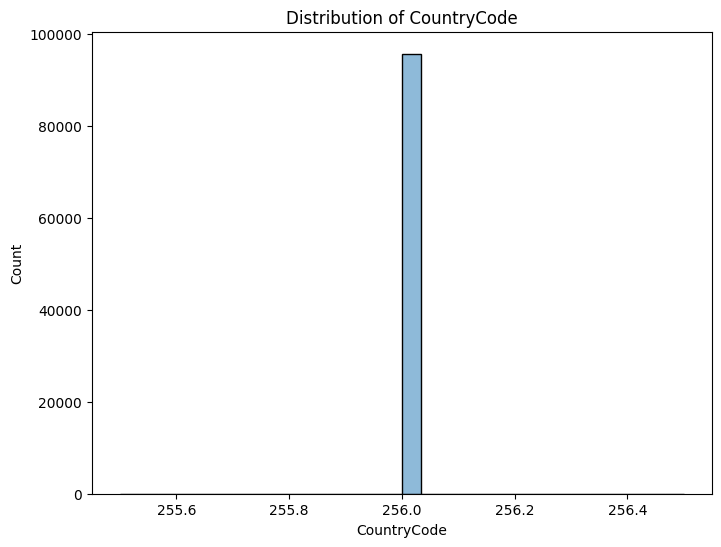

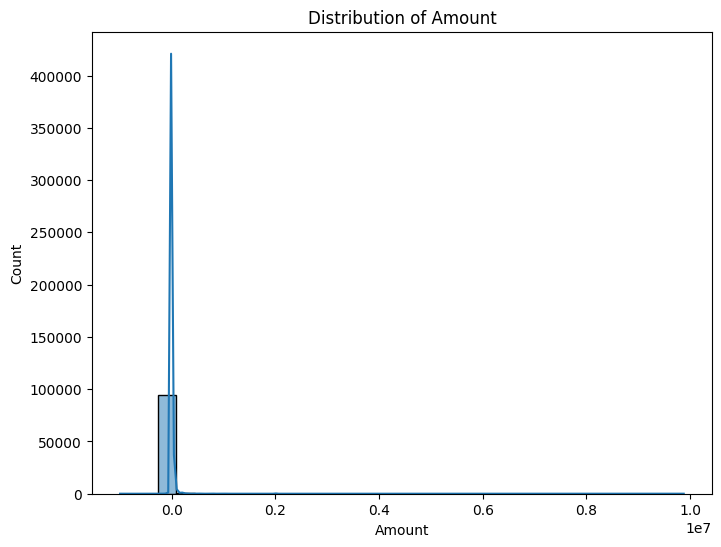

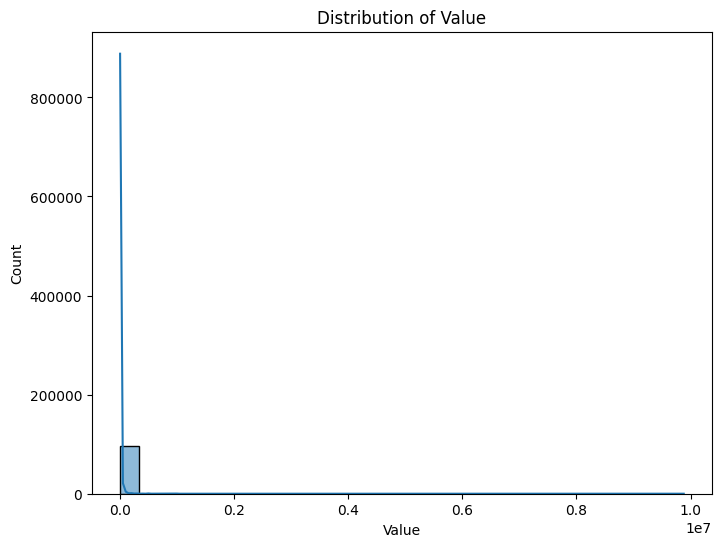

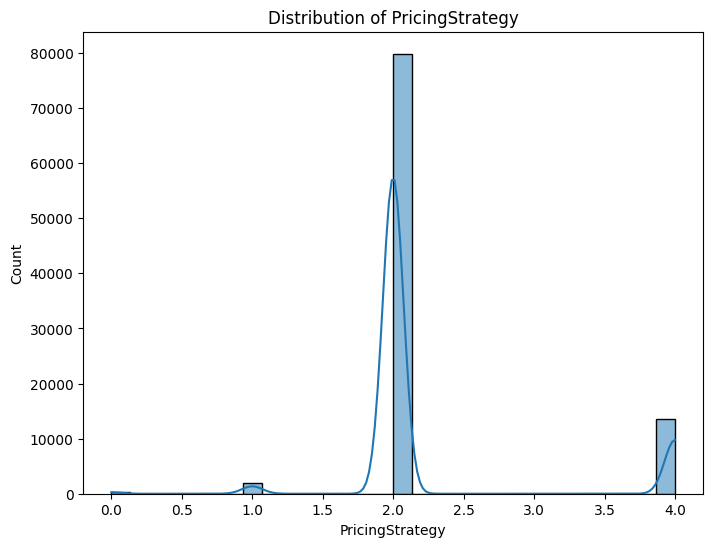

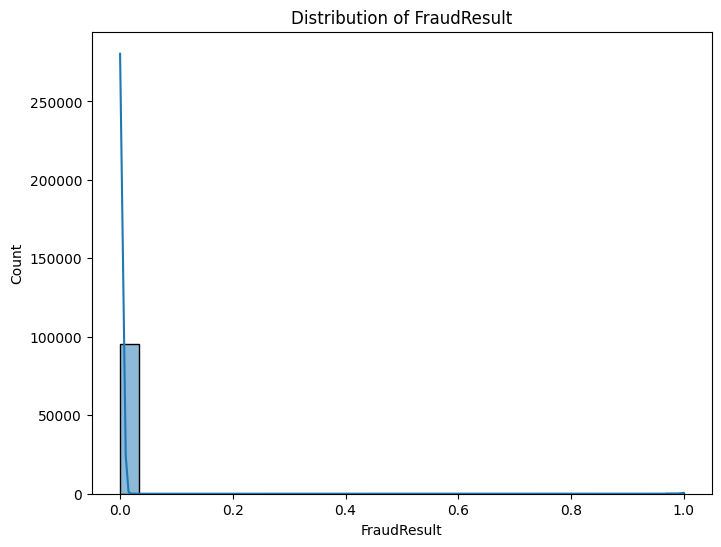

In [33]:

# Visualize numerical distributions
eda.distribution_of_numerical_features()


## Data Distributions Analysis

1. **Distribution of CountryCode**
   - The `CountryCode` around the value `256.0` has an extremely high frequency, nearing 100,000 occurrences. This indicates that this specific code is significantly more common compared to other country codes in the range.

2. **Distribution of Amount**
   - Most of the data points are concentrated at lower amounts. The frequency sharply peaks at low amounts and quickly drops off, indicating that extremely high amounts are rare.

3. **Distribution of Value**
   - The distribution is right-skewed. Most values are small and clustered towards the lower end, with frequencies dropping significantly for larger values. This suggests that high values are uncommon in the dataset.

4. **Distribution of PricingStrategy**
   - Similar to the previous graphs, values are grouped at the lower end of the range, with frequencies decreasing quickly as values increase. Higher pricing strategies are not as prevalent.

5. **Distribution of FraudResult**
   - The majority of data points have a FraudResult of `0`, indicating non-fraudulent transactions. Instances of fraud (greater than `0`) are rare within the dataset.


Skipping TransactionId - Too many unique values (95662)
Skipping BatchId - Too many unique values (94809)
Skipping AccountId - Too many unique values (3633)
Skipping SubscriptionId - Too many unique values (3627)
Skipping CustomerId - Too many unique values (3742)
Skipping CurrencyCode - Only one unique value


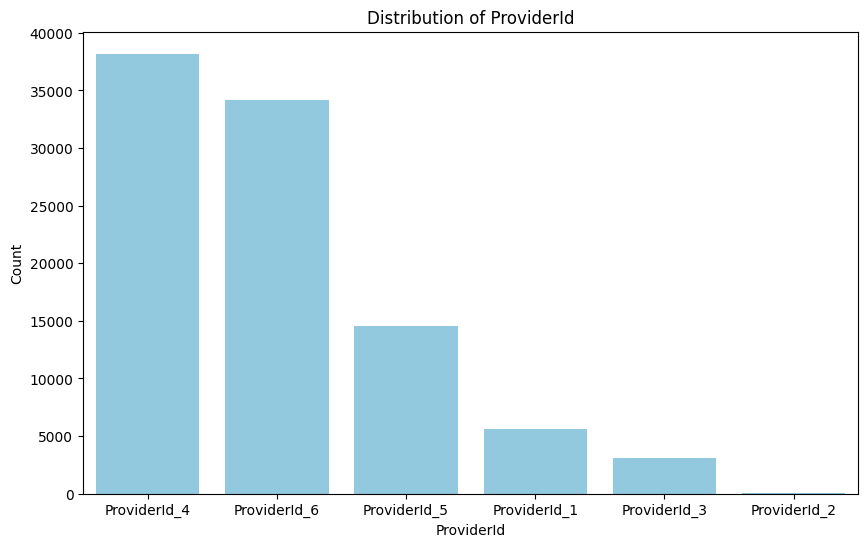

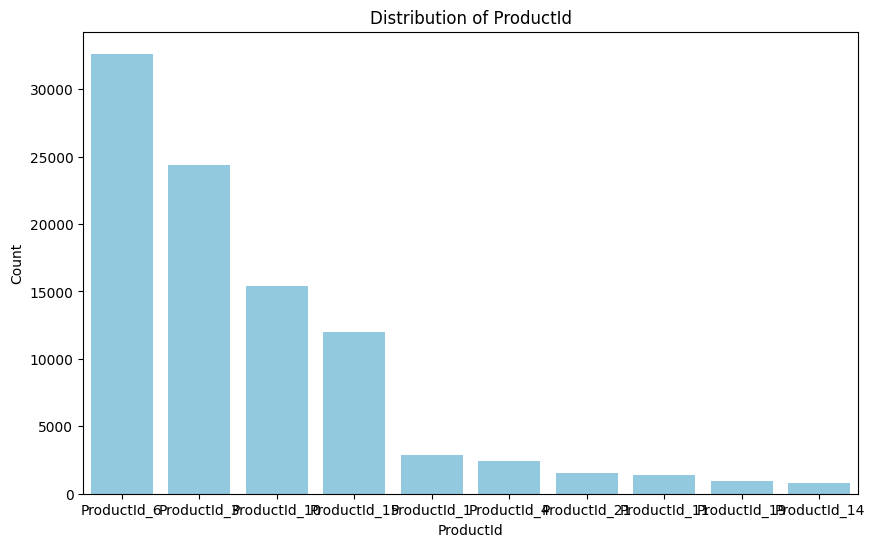

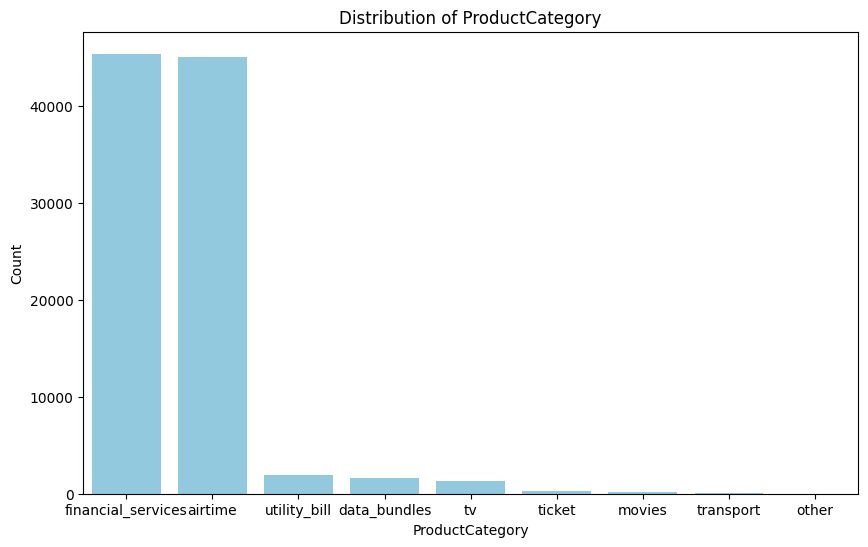

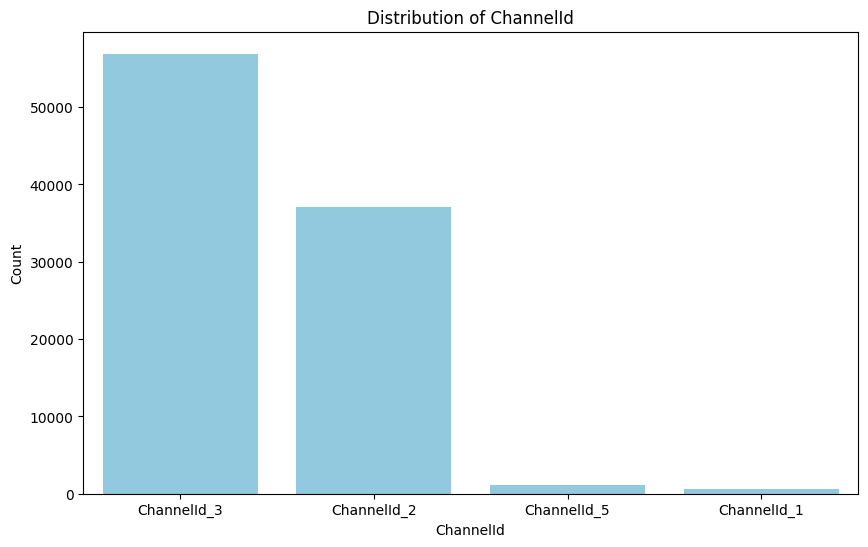

Skipping TransactionStartTime - Too many unique values (94556)


In [34]:

# Visualize categorical distributions
eda.distribution_of_categorical_features(max_unique_values=25)


Correlation Matrix:
                  CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


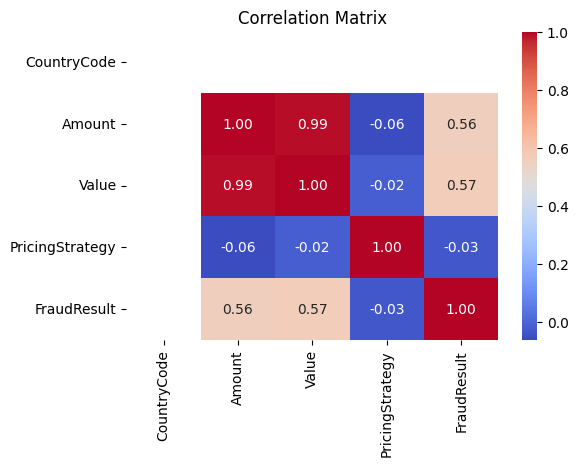

In [40]:

# Visualize correlation matrix
eda.correlation_analysis()


## Correlation Analysis

### Key Observations:
1. **CountryCode and Amount**: Perfect positive correlation (1.00) – they increase together.
2. **CountryCode and Value**: Very strong positive correlation (0.99) – they increase together.
3. **CountryCode and PricingStrategy**: Slight negative correlation (-0.06) – minimal inverse relationship.
4. **CountryCode and FraudResult**: Moderate positive correlation (0.56) – higher country codes may relate to higher fraud.
5. **Amount and Value**: Perfect positive correlation (1.00) – they move in unison.
6. **Amount and PricingStrategy**: Very weak negative correlation (-0.02) – almost no relationship.
7. **Amount and FraudResult**: Moderate positive correlation (0.57) – higher amounts might relate to higher fraud.
8. **Value and PricingStrategy**: Very weak negative correlation (-0.02) – almost no relationship.
9. **Value and FraudResult**: Moderate positive correlation (0.57) – similar to Amount-FraudResult.
10. **PricingStrategy and FraudResult**: Very weak negative correlation (-0.03) – minimal inverse relationship.

### Additional Observations:
- **CountryCode Heatmap:** The CountryCode column is all white in the heatmap, This indicates that the CountryCode column has only one unique value.

In [42]:
eda.identify_missing_values()

Missing Values:
Series([], dtype: int64)


### There are no missing values.

In [43]:
# Check for duplicate rows
duplicate_count = raw_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


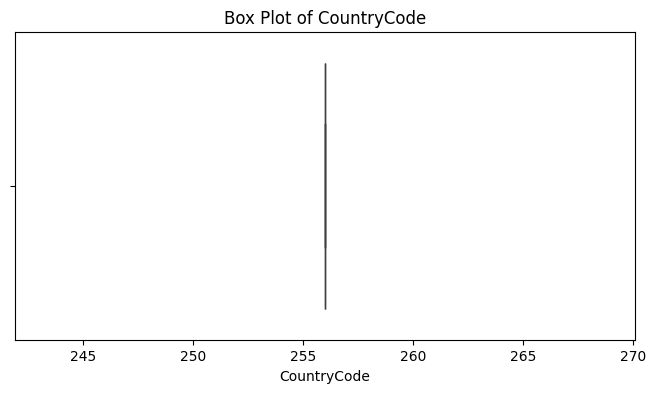

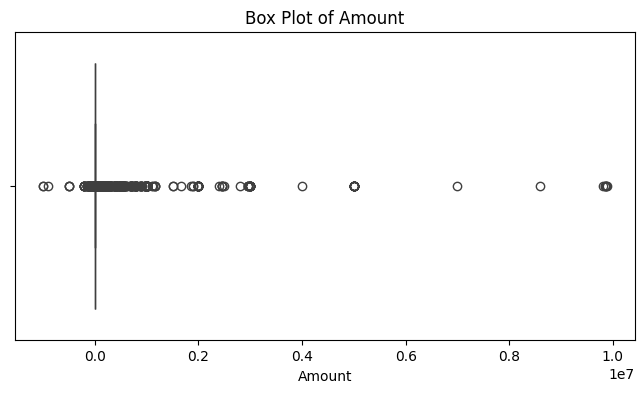

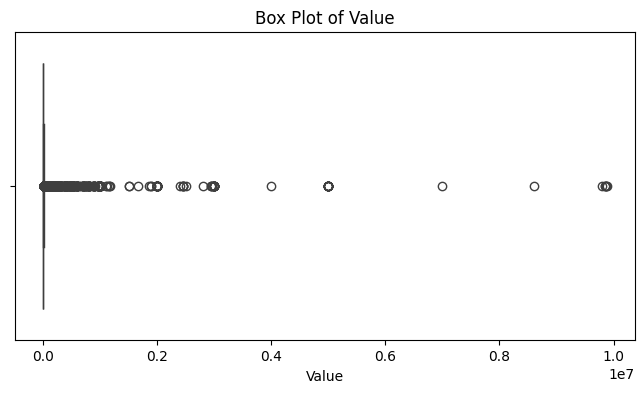

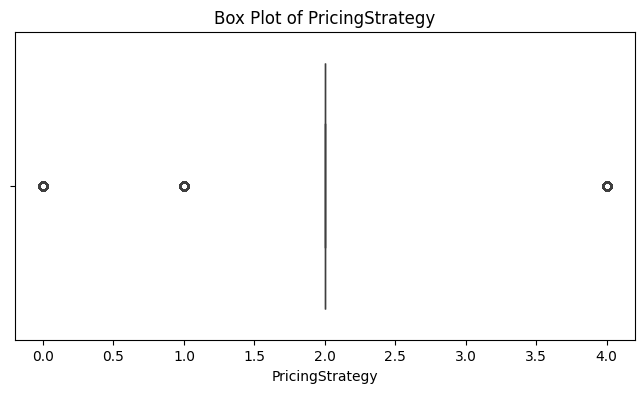

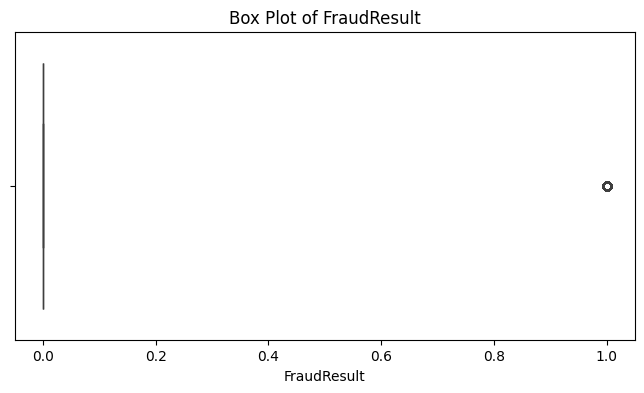

In [46]:
eda.Detect_outliers()

## Outliers Analysis and Decision

### 1. `CountryCode`
- No variability; all values are the same. No outliers present.  
**Decision**: No action needed.

### 2. `Amount` & `Value`
- Highly skewed distributions with extreme outliers reflecting real-world financial behaviors like large transactions.  
**Decision**: Retain outliers to preserve meaningful patterns.

### 3. `PricingStrategy`
- Few outliers represent different valid pricing strategies.  
**Decision**: Retain to capture business variations.

### 4. `FraudResult`
- Rare outliers (1.0) indicate fraud cases, essential for detection.  
**Decision**: Retain for critical fraud insights.

### Conclusion
Outliers will be retained across all features as they reflect valid and meaningful behaviors crucial for downstream analysis and modeling.